In [1]:
import cv2
import pytesseract

In [2]:
def preprocess(img):
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #apply threshold
    threshold = cv2.threshold(gray, 0,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return threshold

In [3]:
def extract_text(img):
    return pytesseract.image_to_string(img)

In [4]:
import google.generativeai as genai
from dotenv import load_dotenv
import os
load_dotenv()
genai.configure(api_key=os.getenv("API_KEY"))
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content("Explain how AI works")

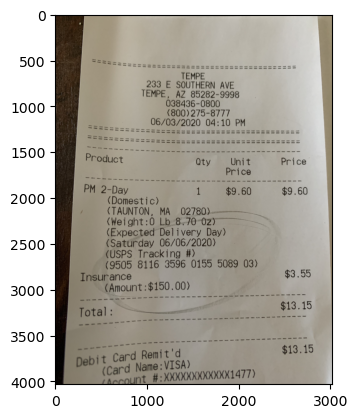

In [5]:
# image before preporcess
import matplotlib.pyplot as plt
image = plt.imread("test2.jpg")
plt.imshow(image)

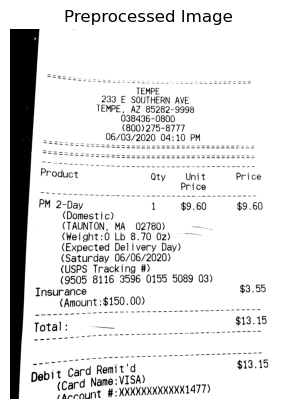

In [6]:

# Preprocess the image
_, processed_img = preprocess('test2.jpg')

# Plot the image
plt.imshow(processed_img, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()

In [7]:
# extraction of the text from the image
extracted_text = extract_text(processed_img)
print(extracted_text)

TEMPE
233 E SOUTHERN AVE
TEMPE, AZ 85282-9998
038436-0800
(800) 275-8777
one. _ 06/03/2020 04: 10 PM
Product Qty Unit Price
_ Price
PM 2-Day | 1 $9.60 $9.60
(Domestic)

(TAUNTON, MA 02780) ee
(Weight:0 Lb 8.70 02) ~~ -
(Expected Delivery Day)
(Saturday 06/06/2020)

(USPS Tracking #)
(9505 8116 3596 0155 5089 03) $3.5
3.55

Insurance
(Amount :$150. 00)
lotal: $13.15

—_
ae ee ee
—_
-
—_ om”
-~— —_
_-_-

Debi” VISA
me
(Card Name KXKXKKKXK1477)

parccount



In [10]:
def ai_extract(text):
    prompt = """ You are a reciept parser AI. I am going to provide you with text from a reciept and I want you to extract the following information in the this structure: {'total','bussiness','items':[{'name','price','quantity'}],'address'}"""
    response = model.generate_content(prompt + text)
    return response.text

In [11]:
print(ai_extract(extracted_text))

```json
{
  "total": "13.15",
  "business": "USPS",
  "items": [
    {
      "name": "PM 2-Day | Domestic",
      "price": "9.60",
      "quantity": "1"
    },
    {
      "name": "Insurance",
      "price": "3.55",
      "quantity": null
    }
  ],
  "address": "233 E SOUTHERN AVE\nTEMPE, AZ 85282-9998"
}
```

